<a href="https://colab.research.google.com/github/jonegreiro/AutoDock_Vina_v_1.1.2./blob/main/Pipeline_do_Autodock_Vina_1_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Pipeline de *Docking* Molecular com Autodock Vina versão 1.1.2**

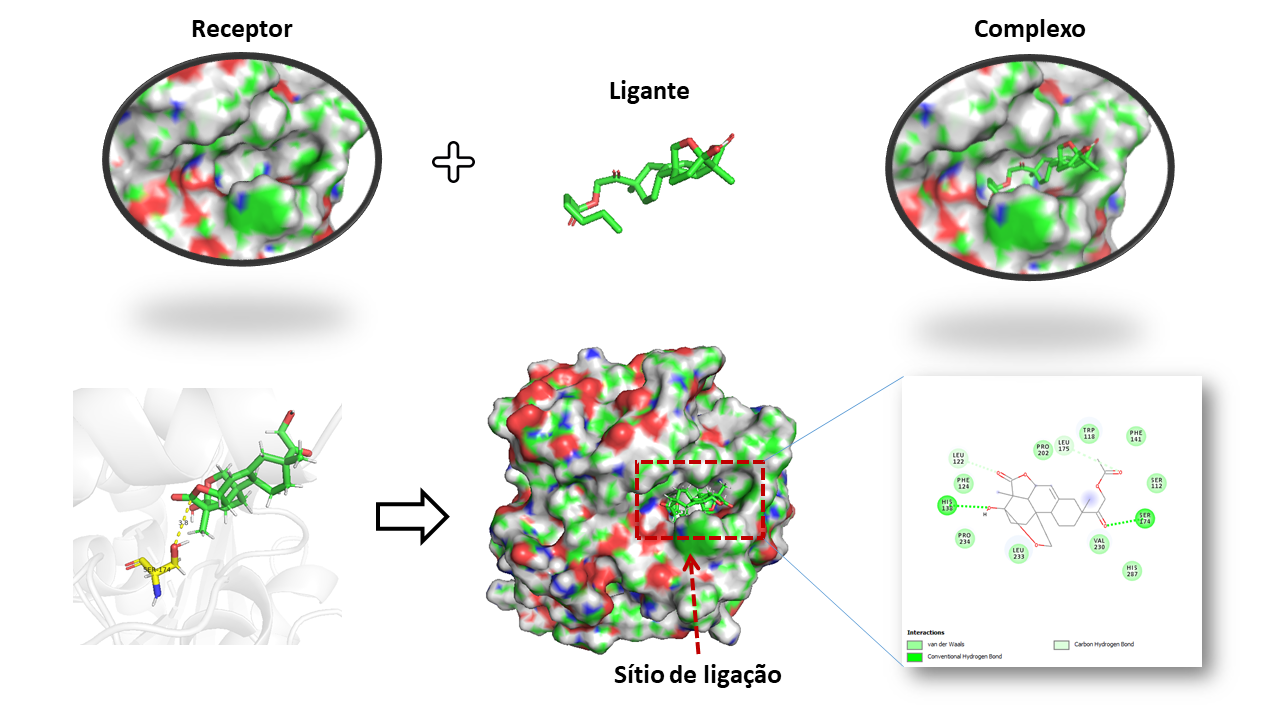


# **Preparação – Instale os pacotes necessários**


Utilizaremos as seguintes bibliotecas e ferramentas para realizar as tarefas mencionadas:


**Biopython:** Esta biblioteca será utilizada para a manipulação dos arquivos PDB, permitindo o acesso e processamento das estruturas moleculares.

**Py3Dmol:** Será empregado para a visualização interativa da estrutura da proteína e para configurar a grade de pesquisa utilizada no processo de docking.

**Miniconda:** Utilizaremos esta versão minimalista e gratuita do Conda para facilitar o gerenciamento dos pacotes de software e ambientes necessários ao projeto.

**OpenBabel:** Essa ferramenta será empregada para a parametrização do(s) ligante(s), preparando-os para a etapa de docking.

**MGLtools:** Será utilizado para parametrizar a proteína alvo, empregando as cargas de Gasteiger, essenciais para o processo de docking.

**PDB2PQR:** Neste pipeline, o PDB2PQR será empregado para realizar a parametrização da proteína, tornando-a pronta para a etapa de docking.

**Autodock Vina:** Esta ferramenta será utilizada para executar o processo de atracamento molecular, possibilitando a predição das interações ligante-proteína.

*Após realizar uma série de testes, chegamos à seguinte configuração recomendada para o ambiente Google Colab neste laboratório*

A instalação dos pacotes Biopython, Py3Dmol e PDB2PQR pode ser feita da seguinte forma:

In [1]:
!pip install py3Dmol
!pip install biopython
!pip install pdb2pqr
!pip install kora
!pip install rdkit-pypi
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.17.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 43.1 MB/s eta 0:00:00


In [2]:
# Importando py3Dmol para visualização interativa de estruturas moleculares em 3D
from IPython.display import HTML
import py3Dmol

In [3]:
# Verificando se pdb2pqr foi instalado corretamente
!pdb2pqr30 -h

usage: pdb2pqr [-h] [--ff {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}] [--userff USERFF] [--clean]
               [--nodebump] [--noopt] [--keep-chain] [--assign-only]
               [--ffout {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}] [--usernames USERNAMES]
               [--apbs-input APBS_INPUT] [--pdb-output PDB_OUTPUT] [--ligand LIGAND]
               [--whitespace] [--neutraln] [--neutralc] [--drop-water] [--include-header]
               [--titration-state-method {propka}] [--with-ph PH] [-f FILENAMES] [-r REFERENCE]
               [-c CHAINS] [-i TITRATE_ONLY] [-t THERMOPHILES] [-a ALIGNMENT] [-m MUTATIONS]
               [-p PARAMETERS] [--log-level {DEBUG,INFO,WARNING,ERROR,CRITICAL}] [-o PH]
               [-w WINDOW WINDOW WINDOW] [-g GRID GRID GRID] [--mutator MUTATOR]
               [--mutator-option MUTATOR_OPTIONS] [-d] [-l] [-k] [-q] [--protonate-all]
               [--version]
               input_path output_pqr

PDB2PQR v3.6.2: biomolecular structure conversion softwa

Vamos instalar o miniconda para poder instalar OpenBabel e MGLtools

In [4]:
# Instalando Miniconda usando a biblioteca conda-colab
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [1]:
# Configurando o caminho para o Miniconda
import sys
sys.path.append('/root/miniconda3/lib/python3.7/site-packages')

!conda install -c conda-forge -c bioconda mgltools openbabel zlib --yes

Channels:
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mgltools
    - openbabel
    - zlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    expat-2.6.4                |       h5888daf_0         135 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_

Finalmente, baixe e instale o Autodock Vina

In [2]:
# Baixando e extraindo o Autodock Vina do SCRIPPS
# Em seguida, configuramos um alias para o vina ser tratado como um binário nativo
%%bash
wget https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
tar xzvf autodock_vina_1_1_2_linux_x86.tgz
rm autodock_vina_1_1_2_linux_x86.tgz

autodock_vina_1_1_2_linux_x86/
autodock_vina_1_1_2_linux_x86/LICENSE
autodock_vina_1_1_2_linux_x86/bin/
autodock_vina_1_1_2_linux_x86/bin/vina
autodock_vina_1_1_2_linux_x86/bin/vina_split


--2024-11-18 13:59:47--  https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
Resolving vina.scripps.edu (vina.scripps.edu)... 192.26.252.19
Connecting to vina.scripps.edu (vina.scripps.edu)|192.26.252.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1238242 (1.2M) [application/x-gzip]
Saving to: ‘autodock_vina_1_1_2_linux_x86.tgz’

     0K .......... .......... .......... .......... ..........  4%  341K 3s
    50K .......... .......... .......... .......... ..........  8%  681K 2s
   100K .......... .......... .......... .......... .......... 12%  676K 2s
   150K .......... .......... .......... .......... .......... 16%  153M 1s
   200K .......... .......... .......... .......... .......... 20% 51.9M 1s
   250K .......... .......... .......... .......... .......... 24%  696K 1s
   300K .......... .......... .......... .......... .......... 28%  166M 1s
   350K .......... .......... .......... .......... .......... 

In [3]:
# Configurando o caminho para o Autodock Vina
import os
os.environ['PATH'] += ":/content/autodock_vina_1_1_2_linux_x86/bin"

In [4]:
# Verificando se o Autodock Vina foi instalado corretamente
!vina --help


Input:
  --receptor arg        rigid part of the receptor (PDBQT)
  --flex arg            flexible side chains, if any (PDBQT)
  --ligand arg          ligand (PDBQT)

Search space (required):
  --center_x arg        X coordinate of the center
  --center_y arg        Y coordinate of the center
  --center_z arg        Z coordinate of the center
  --size_x arg          size in the X dimension (Angstroms)
  --size_y arg          size in the Y dimension (Angstroms)
  --size_z arg          size in the Z dimension (Angstroms)

Output (optional):
  --out arg             output models (PDBQT), the default is chosen based on 
                        the ligand file name
  --log arg             optionally, write log file

Misc (optional):
  --cpu arg                 the number of CPUs to use (the default is to try to
                            detect the number of CPUs or, failing that, use 1)
  --seed arg                explicit random seed
  --exhaustiveness arg (=8) exhaustiveness of the glo

# **Parte 1 - Preparação do alvo molecular**


Nesta etapa, procederemos com a preparação do alvo molecular para o processo de re-*docking*. Siga as instruções abaixo:

1. Baixe o arquivo do alvo molecular no formato PDB da fonte desejada, [clique aqui](https://www.rcsb.org/) e escolha o alvo molecular de interesse.

2. Utilizando a biblioteca py3Dmol, visualize a estrutura tridimensional do alvo molecular a partir do arquivo PDB baixado.

3. Realize eventuais pré-processamentos, como remoção de água e contraíon, e extraia somente os resíduos proteicos relevantes.

4. Salve a versão modificada do alvo molecular em um novo arquivo PDB e realize a parametrização necessária.

5. Extraia o ligante co-cristalizado, e em seguida, realize a parametrização e obtenção das coordenadas espaciais.

6. Verifique se todos os arquivos necessários estão disponíveis para o processo de re-*docking*.

*Assegure-se de seguir as diretrizes apropriadas para a preparação do receptor, considerando os requisitos específicos do Autodock Vina e seguindo as melhores práticas para a preparação de proteínas para o docking molecular.*

In [5]:
import urllib.request

#@title **Passo 1. Digite o ID PDB de interesse**
#@markdown Digite o ID PDB do alvo molecular de interesse.

pdb_id = input("Digite o ID PDB: ")

def baixar_pdb(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    nome_arquivo = f"{pdb_id}.pdb"
    urllib.request.urlretrieve(url, nome_arquivo)
    print(f"O arquivo {nome_arquivo} foi baixado com sucesso!")

baixar_pdb(pdb_id)

Digite o ID PDB: 1pxx
O arquivo 1pxx.pdb foi baixado com sucesso!


In [6]:
import py3Dmol
import os
from ipywidgets import widgets, interact

#@title Visualizar o alvo molecular

def visualize_pdb(pdb_filename):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    view.setStyle({'cartoon': {'color': 'spectrum'}})

    view.setStyle({'hetflag': True}, {'stick': {}})

    view.setStyle({'resn': 'HOH'}, {'sphere': {'opacity': 0.5}})

    view.setStyle({'hetflag': True, 'resn': '!HOH'}, {'stick': {}})

    view.zoomTo()
    view.show()

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

def visualize_selected_pdb(b):
    pdb_filename = pdb_dropdown.value
    visualize_pdb(pdb_filename)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdb)

Dropdown(description='PDB file:', options=('1pxx.pdb',), style=DescriptionStyle(description_width='initial'), …

Button(description='Visualizar', style=ButtonStyle())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
import os
import ipywidgets as widgets
from IPython.display import display

#@title **Passo 2. Extraia residuos não proteícos**
#@markdown Esse processo irá resultar na geração de uma estrutura do alvo molecular limpo, específica para o *docking* molecular.\
#@markdown As cadeias individuais do receptor serão extraídas e salvas em arquivos separados.

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

button = widgets.Button(description="Extrair proteína")
display(button)

def separate_chain(pdb_file):
    chains = set()
    with open(pdb_file, 'r') as f:
        for line in f:
            if line.startswith('ATOM'):
                chain_id = line[21]
                chains.add(chain_id)

    file_base = os.path.splitext(pdb_file)[0]

    for chain_id in chains:
        chain_file = f"{file_base}_chain_{chain_id}.pdb"
        with open(chain_file, 'w') as f_out, open(pdb_file, 'r') as f_in:
            for line in f_in:
                if line.startswith('ATOM') and line[21] == chain_id:
                    f_out.write(line)

        print(f"+ Chain {chain_id} extracted from {pdb_file} --> {chain_file}")

def extract_protein(b):
    pdb_file = pdb_dropdown.value
    separate_chain(pdb_file)

button.on_click(extract_protein)

Dropdown(description='PDB file:', options=('1pxx.pdb',), style=DescriptionStyle(description_width='initial'), …

Button(description='Extrair proteína', style=ButtonStyle())

+ Chain C extracted from 1pxx.pdb --> 1pxx_chain_C.pdb
+ Chain B extracted from 1pxx.pdb --> 1pxx_chain_B.pdb
+ Chain D extracted from 1pxx.pdb --> 1pxx_chain_D.pdb
+ Chain A extracted from 1pxx.pdb --> 1pxx_chain_A.pdb


# **Preparação do alvo molecular**

Neste estágio crucial do *pipeline*, é essencial garantir que o alvo molecular contenha todos os hidrogênios polares necessários para estabelecer ligações de hidrogênio com o ligante. É importante ressaltar que muitas estruturas proteicas disponíveis não possuem hidrogênios atribuídos, o que torna imprescindível adicioná-los para garantir a precisão e efetividade do nosso experimento.

**Realize a adição dos hidrogênios polares ao alvo molecular e faça a parametrização com base no pKa de cada aminoácido em um pH desejado, utilizando o campo de força de sua escolha. Essa etapa pode ser feita utilizando o pdb2pqr, seguida pela exclusão dos hidrogênios apolares e conversão do arquivo para o formato PDBQT utilizando o MGLtools.**

No processo mencionado, o pdb2pqr gera um arquivo intermediário chamado PQR, que é uma modificação do formato PDB, permitindo a adição de parâmetros de carga e raio aos dados existentes. Essa informação permanece inalterada durante o uso do MGLtools.


In [8]:
#@title **Passo 3. Parametrizando o alvo molecular utilizando o pdb2pqr e em seguida obtendo o PDBQT com MGLtools**

import os
import shutil

pdb_files = [f for f in os.listdir('.') if f.endswith('.pdb')]

if not pdb_files:
    print("Nenhum arquivo .pdb disponível no diretório.")
else:
    print("Arquivos .pdb disponíveis:")
    for i, pdb_file in enumerate(pdb_files):
        print(f"{i+1}. {pdb_file}")

    selection = input("Digite o número do arquivo .pdb que deseja selecionar: ")

    try:
        selection = int(selection)
        if 1 <= selection <= len(pdb_files):
            chosen_pdb = pdb_files[selection-1]
            print(f"Arquivo selecionado: {chosen_pdb}")

            dock_dir = f"redocking"
            os.makedirs(dock_dir, exist_ok=True)

            ph = input("Digite o pH de trabalho: ")

            force_fields = ['AMBER', 'CHARMM', 'OPLS', 'GROMACS']
            print("Campos de força disponíveis:")
            for i, force_field in enumerate(force_fields):
                print(f"{i+1}. {force_field}")
            force_field_selection = input("Digite o número do campo de força desejado: ")

            try:
                force_field_selection = int(force_field_selection)
                if 1 <= force_field_selection <= len(force_fields):
                    chosen_force_field = force_fields[force_field_selection-1]
                    print(f"Campo de força selecionado: {chosen_force_field}")

                    os.system(f"pdb2pqr30 --ff {chosen_force_field} --chain A --titration-state-method propka --with-ph {ph} {chosen_pdb} {dock_dir}/{chosen_pdb[:-4]}.pqr")

                    os.system(f"prepare_receptor4.py -r {dock_dir}/{chosen_pdb[:-4]}.pqr -o {dock_dir}/{chosen_pdb[:-4]}.pdbqt -A checkhydrogens -U nphs_lps -v")

                    print(f"Arquivo {chosen_pdb[:-4]}.pdbqt gerado com sucesso.")

                else:
                    print("Seleção inválida para o campo de força.")
            except ValueError:
                print("Entrada inválida para o campo de força. Digite um número válido.")

        else:
            print("Seleção inválida para o arquivo .pdb.")
    except ValueError:
        print("Entrada inválida para o arquivo .pdb. Digite um número válido.")

dock_dir = f"redocking"
pdbqt_files = [f for f in os.listdir(dock_dir) if f.endswith('.pdbqt')]

if not pdbqt_files:
    print("Nenhum arquivo .pdbqt disponível no diretório de docking.")
else:
    print("Arquivos .pdbqt disponíveis:")
    for i, pdbqt_file in enumerate(pdbqt_files):
        print(f"{i+1}. {pdbqt_file}")

    selection = input("Digite o número do arquivo .pdbqt que deseja selecionar: ")

    try:
        selection = int(selection)
        if 1 <= selection <= len(pdbqt_files):
            chosen_pdbqt = pdbqt_files[selection-1]
            print(f"Arquivo selecionado: {chosen_pdbqt}")

            shutil.move(f"{dock_dir}/{chosen_pdbqt}", f"{dock_dir}/{chosen_pdbqt}")

            shutil.copy(f"{dock_dir}/{chosen_pdbqt}", chosen_pdbqt)

            print(f"Arquivo {chosen_pdbqt} gerado e salvo no diretório {dock_dir}.")
            print(f"Cópia do arquivo {chosen_pdbqt} criada no diretório atual.")

        else:
            print("Seleção inválida para o arquivo .pdbqt.")
    except ValueError:
        print("Entrada inválida para o arquivo .pdbqt. Digite um número válido.")

Arquivos .pdb disponíveis:
1. 1pxx_chain_D.pdb
2. 1pxx_chain_A.pdb
3. 1pxx_chain_C.pdb
4. 1pxx_chain_B.pdb
5. 1pxx.pdb
Digite o número do arquivo .pdb que deseja selecionar: 2
Arquivo selecionado: 1pxx_chain_A.pdb
Digite o pH de trabalho: 7.4
Campos de força disponíveis:
1. AMBER
2. CHARMM
3. OPLS
4. GROMACS
Digite o número do campo de força desejado: 1
Campo de força selecionado: AMBER
Arquivo 1pxx_chain_A.pdbqt gerado com sucesso.
Arquivos .pdbqt disponíveis:
1. 1pxx_chain_A.pdbqt
Digite o número do arquivo .pdbqt que deseja selecionar: 1
Arquivo selecionado: 1pxx_chain_A.pdbqt
Arquivo 1pxx_chain_A.pdbqt gerado e salvo no diretório redocking.
Cópia do arquivo 1pxx_chain_A.pdbqt criada no diretório atual.


In [9]:
#@title Visualize o alvo PDBQT

import py3Dmol
import os
from ipywidgets import widgets, interact

def visualize_pdb(pdb_filename, representation):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    if representation == 'cartoon':
        view.setStyle({'cartoon': {'color': 'spectrum'}})
    elif representation == 'sticks':
        view.setStyle({'stick': {}})

    view.zoomTo()
    view.show()

dock_dir = [dir for dir in os.listdir() if dir.startswith("redocking")]
if not dock_dir:
    print("Diretório de docking não encontrado. Execute o código anterior para criar o diretório.")
    exit()

pdbqt_files = [file for file in os.listdir(dock_dir[0]) if file.endswith(".pdbqt")]

pdbqt_dropdown = widgets.Dropdown(
    options=pdbqt_files,
    description='PDBQT file:',
    style={'description_width': 'initial'}
)
display(pdbqt_dropdown)

representation_dropdown = widgets.Dropdown(
    options=['cartoon', 'sticks'],
    description='Representation:',
    style={'description_width': 'initial'}
)
display(representation_dropdown)

def visualize_selected_pdbqt(b):
    pdbqt_filename = os.path.join(dock_dir[0], pdbqt_dropdown.value)
    representation = representation_dropdown.value
    visualize_pdb(pdbqt_filename, representation)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdbqt)

Dropdown(description='PDBQT file:', options=('1pxx_chain_A.pdbqt',), style=DescriptionStyle(description_width=…

Dropdown(description='Representation:', options=('cartoon', 'sticks'), style=DescriptionStyle(description_widt…

Button(description='Visualizar', style=ButtonStyle())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
#@title **Passo 4. Extrair o ligante co-cristalizado para re-*docking***
#@markdown Verifique no **Protein Data Bank (PDB)** as informações sobre o ligante co-cristalizado.

#@markdown Anote o nome do resíduo e a cadeia do ligante.


import os
import ipywidgets as widgets
from IPython.display import display


def extract_ligand_residue(pdb_filename, ligand_resname, chain_id=None):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.readlines()

    ligand_residues = []

    for line in pdb_data:
        if line.startswith("HETATM"):
            resname = line[17:20].strip()
            chain = line[21]
            if resname == ligand_resname and (chain_id is None or chain == chain_id):
                ligand_residues.append(line)

    return ligand_residues


def write_ligand_pdb(pdb_filename, ligand_residues):
    pdb_basename = os.path.splitext(pdb_filename)[0]
    ligand_pdb_filename = f"{pdb_basename}_ligante.pdb"

    with open(ligand_pdb_filename, 'w') as ligand_pdb_file:
        ligand_pdb_file.writelines(ligand_residues)

    print(f"Arquivo {ligand_pdb_filename} gerado com sucesso!")


pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]
pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:'
)

ligand_resname_input = widgets.Text(
    description='Ligand ID:'
)

chain_id_input = widgets.Text(
    description='Cadeia do Ligante:'
)

run_button = widgets.Button(description='Extrair')


def run_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    ligand_resname = ligand_resname_input.value
    chain_id = chain_id_input.value

    ligand_residues = extract_ligand_residue(pdb_filename, ligand_resname, chain_id)
    if ligand_residues:
        print("Resíduos do ligante encontrados:")
        for residue in ligand_residues:
            print(residue.strip())
        write_ligand_pdb(pdb_filename, ligand_residues)
    else:
        print("Nenhum resíduo do ligante encontrado para o resíduo e cadeia especificados.")


run_button.on_click(run_button_clicked)

display(pdb_dropdown, ligand_resname_input, chain_id_input, run_button)

Dropdown(description='PDB file:', options=('1pxx_chain_D.pdb', '1pxx_chain_A.pdb', '1pxx_chain_C.pdb', '1pxx_c…

Text(value='', description='Ligand ID:')

Text(value='', description='Cadeia do Ligante:')

Button(description='Extrair', style=ButtonStyle())

Resíduos do ligante encontrados:
HETATM18158  C1  DIF A 701      26.313  21.405  17.712  1.00 38.13           C
HETATM18159  C2  DIF A 701      26.065  22.511  16.868  1.00 39.49           C
HETATM18160 CL2  DIF A 701      24.417  22.703  16.432  1.00 48.10          CL
HETATM18161  C3  DIF A 701      27.128  23.265  16.312  1.00 40.58           C
HETATM18162  C4  DIF A 701      28.456  22.836  16.649  1.00 40.32           C
HETATM18163 CL4  DIF A 701      29.844  23.663  16.041  1.00 46.35          CL
HETATM18164  C5  DIF A 701      28.692  21.725  17.480  1.00 38.88           C
HETATM18165  C6  DIF A 701      27.618  21.016  18.014  1.00 40.33           C
HETATM18166  N1  DIF A 701      27.058  24.431  15.437  1.00 35.21           N
HETATM18167  C7  DIF A 701      26.417  25.622  13.353  1.00 28.89           C
HETATM18168  C8  DIF A 701      26.533  24.442  14.127  1.00 30.87           C
HETATM18169  C9  DIF A 701      26.213  23.207  13.552  1.00 31.18           C
HETATM18170  C10 DI

In [11]:
#@title Visualize o ligante co-cristalizado
import py3Dmol
import os
from ipywidgets import widgets, interact

def visualize_pdb(pdb_filename):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    view.setStyle({'cartoon': {'color': 'spectrum'}})

    view.setStyle({'hetflag': True}, {'stick': {}})

    view.setStyle({'resn': 'HOH'}, {'sphere': {'opacity': 0.5}})

    view.setStyle({'hetflag': True, 'resn': '!HOH'}, {'stick': {}})

    view.zoomTo()
    view.show()

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

def visualize_selected_pdb(b):
    pdb_filename = pdb_dropdown.value
    visualize_pdb(pdb_filename)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdb)

Dropdown(description='PDB file:', options=('1pxx_chain_D.pdb', '1pxx_chain_A.pdb', '1pxx_chain_C.pdb', '1pxx_c…

Button(description='Visualizar', style=ButtonStyle())

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
#@title **Passo 5. Parametrização do ligante co-cristalizado com definição de pH e diretório de destino**
#@markdown Este passo do código é responsável pela
#@markdown conversão de arquivos PDB
#@markdown para arquivos PDBQT, permitindo
#@markdown a especificação de um pH personalizado para as moléculas.

#@markdown *O formato PDBQT é essencial para a execução*
#@markdown *e acoplamentos moleculares usando a ferramenta AutoDock Vina.*

import openbabel
import os
import ipywidgets as widgets
from IPython.display import display
import tkinter as tk
from tkinter import filedialog

def convert_pdb_to_pdbqt(pdb_filename, pdbqt_filename, pH):
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdb", "pdbqt")

    mol = openbabel.OBMol()
    conv.ReadFile(mol, pdb_filename)

    mol.SetTitle(f"pH={pH:.1f}")
    mol.AddHydrogens(False, True, pH)

    charge_model = openbabel.OBChargeModel.FindType("gasteiger")
    charge_model.ComputeCharges(mol)

    conv.WriteFile(mol, pdbqt_filename)

pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='Ligand file:'
)

pH_input = widgets.FloatText(
    description='pH:'
)

directory_input = widgets.Text(
    value='redocking',
    description='Diretório de destino:'
)

button = widgets.Button(description='Converter')

def convert_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    pdbqt_filename = pdb_filename.replace('.pdb', '.pdbqt')
    pH = pH_input.value
    destination_directory = directory_input.value

    pdbqt_filepath = os.path.join(destination_directory, pdbqt_filename)

    convert_pdb_to_pdbqt(pdb_filename, pdbqt_filepath, pH)
    print(f"Conversão concluída. Arquivo {pdbqt_filepath} gerado com sucesso!")

button.on_click(convert_button_clicked)

display(pdb_dropdown, pH_input, directory_input, button)

Dropdown(description='Ligand file:', options=('1pxx_chain_D.pdb', '1pxx_chain_A.pdb', '1pxx_chain_C.pdb', '1px…

FloatText(value=0.0, description='pH:')

Text(value='redocking', description='Diretório de destino:')

Button(description='Converter', style=ButtonStyle())

Conversão concluída. Arquivo redocking/1pxx_ligante.pdbqt gerado com sucesso!


/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [12]:
#@title **Passo 6. Geração do arquivo conf.txt com coordenadas espaciais**

#@markdown Nesta etapa, é necessário configurar os
#@markdown parâmetros para a criação do arquivo conf.txt,
#@markdown que conterá as coordenadas espaciais para o
#@markdown processo de *docking* molecular.

#@markdown *Você deve especificar o alvo molecular (PBD), o receptor (PDBQT), o resíduo do ligante e a cadeia*
#@markdown *que serão usados no processo.*
#@markdown *Além disso, é fundamental definir os*
#@markdown *parâmetros de exaustividade (exhaustiveness) e o número de modos (num_modes).*

#@markdown Obrservação: As informações fornecidas, como o **resíduo do ligante** e a **cadeia**, serão usadas para determinar as coordenadas do ligante co-cristalizado, que servirão como referência para o processo de *docking* molecular.


import ipywidgets as widgets
from IPython.display import display
import os
import shutil

def get_ligand_coordinates(pdb_filename, ligand_resname, chain_id=None):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.readlines()

    ligand_coordinates = []

    for line in pdb_data:
        if line.startswith("HETATM"):
            resname = line[17:20].strip()
            chain = line[21]
            if resname == ligand_resname and (chain_id is None or chain == chain_id):
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ligand_coordinates.append((x, y, z))

    return ligand_coordinates

def calculate_grid_parameters(ligand_coordinates, padding=8.0):
    min_x = min(coord[0] for coord in ligand_coordinates)
    max_x = max(coord[0] for coord in ligand_coordinates)
    min_y = min(coord[1] for coord in ligand_coordinates)
    max_y = max(coord[1] for coord in ligand_coordinates)
    min_z = min(coord[2] for coord in ligand_coordinates)
    max_z = max(coord[2] for coord in ligand_coordinates)

    center_x = (max_x + min_x) / 2.0
    center_y = (max_y + min_y) / 2.0
    center_z = (max_z + min_z) / 2.0

    size_x = max_x - min_x + padding
    size_y = max_y - min_y + padding
    size_z = max_z - min_z + padding

    return center_x, center_y, center_z, size_x, size_y, size_z

def generate_conf_file(receptor_pdbqt, ligand_coordinates, padding=8.0, exhaustiveness=16, num_modes=30):
    center_x, center_y, center_z, size_x, size_y, size_z = calculate_grid_parameters(ligand_coordinates, padding)

    conf_data = f"""
receptor = {receptor_pdbqt}
out = out.pdbqt

center_x = {center_x}
center_y = {center_y}
center_z = {center_z}

size_x = {size_x}
size_y = {size_y}
size_z = {size_z}

exhaustiveness = {exhaustiveness}
num_modes = {num_modes}
"""

    return conf_data

def display_conf_file(conf_data):
    print(conf_data)

pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]
pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:'
)

receptor_files = [file for file in os.listdir('.') if file.endswith('.pdbqt')]
receptor_dropdown = widgets.Dropdown(
    options=receptor_files,
    description='Receptor.pdbqt:'
)

ligand_resname_input = widgets.Text(
    description='Ligand ID:'
)

chain_id_input = widgets.Text(
    description='Cadeia do Ligante'
)
exhaustiveness_input = widgets.IntText(
    value=16,
    description='Exhaustiveness:'
)

num_modes_input = widgets.IntText(
    value=30,
    description='Num Modes:'
)

run_button = widgets.Button(description='Executar')

def run_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    receptor_pdbqt = receptor_dropdown.value
    ligand_resname = ligand_resname_input.value
    chain_id = chain_id_input.value
    exhaustiveness = exhaustiveness_input.value
    num_modes = num_modes_input.value

    ligand_coordinates = get_ligand_coordinates(pdb_filename, ligand_resname, chain_id)

    dock_dir = f"redocking"
    os.makedirs(dock_dir, exist_ok=True)

    conf_data = generate_conf_file(receptor_pdbqt, ligand_coordinates, exhaustiveness=exhaustiveness, num_modes=num_modes)

    conf_file_path = os.path.join(dock_dir, 'conf.txt')
    with open(conf_file_path, 'w') as conf_file:
        conf_file.write(conf_data)

    display_conf_file(conf_data)

run_button.on_click(run_button_clicked)

display(pdb_dropdown, receptor_dropdown, ligand_resname_input, chain_id_input, exhaustiveness_input, num_modes_input, run_button)

Dropdown(description='PDB file:', options=('1pxx_chain_D.pdb', '1pxx_chain_A.pdb', '1pxx_chain_C.pdb', '1pxx_c…

Dropdown(description='Receptor.pdbqt:', options=('1pxx_chain_A.pdbqt',), value='1pxx_chain_A.pdbqt')

Text(value='', description='Ligand ID:')

Text(value='', description='Cadeia do Ligante')

IntText(value=16, description='Exhaustiveness:')

IntText(value=30, description='Num Modes:')

Button(description='Executar', style=ButtonStyle())


receptor = 1pxx_chain_A.pdbqt
out = out.pdbqt

center_x = 27.1305
center_y = 24.348
center_z = 14.747499999999999

size_x = 13.427
size_y = 14.664000000000001
size_z = 14.533

exhaustiveness = 16
num_modes = 30



# **Parte 2 - Re-*docking* molecular**

In [13]:
#@title Mudar o diretorio para o re-*docking*

import os

dock_dir = "/content/redocking"

os.chdir(dock_dir)

In [14]:
#@title Obter a lista de arquivos no diretório atual
#@markdown Confira se tem todos os arquivos necessários para rodar o Autodock Vina.

#@markdown **receptor.pdbqt**;

#@markdown **ligante.pdbqt**;

#@markdown **conf.txt**;

import os

files = os.listdir()

for file in files:
    print(file)


1pxx_chain_A.pqr
conf.txt
1pxx_ligante.pdbqt
1pxx_chain_A.log
1pxx_chain_A.pdbqt


In [15]:
#@title **Passo 7. Geração do script vina_vs.sh para executar o AutoDock Vina**
#@markdown Neste passo, vamos criar um script chamado vina_vs.sh e, em seguida, executá-lo para rodar o AutoDock Vina.

import os
import subprocess

current_dir = os.getcwd()

script_filename = os.path.join(current_dir, "vina_vs.sh")

script_content = '''\
#!/bin/bash
for f in *.pdbqt; do
    b=$(basename "$f" .pdbqt)
    echo "Processing ligand $b"
    vina --config conf.txt --ligand "$f" --out "${b}_out.pdbqt" --log "${b}_log.txt"
done
'''

with open(script_filename, 'w') as script_file:
    script_file.write(script_content)

subprocess.run(["chmod", "+x", script_filename])

!bash vina_vs.sh

Processing ligand 1pxx_chain_A
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 2 CPUs
Reading input ... 

Parse error on line 1 in file "1pxx_chain_A.pdbqt": Unknown or inappropria

**Validação do re-*docking* molecular através da análise de sobreposição e RMSD**

*Nesta etapa do pipeline, procederemos à validação da técnica computacional através do re-docking molecular por meio de uma análise criteriosa da sobreposição entre as estruturas e do valor do RMSD.*

A sobreposição entre as estruturas obtidas durante o processo de re-*docking* será minuciosamente examinada, e o valor do RMSD será calculado para avaliar a precisão das predições.

Considerando os resultados, se o valor do RMSD for menor que 2.0 Å (Angströms), poderemos afirmar que a técnica computacional foi validado com sucesso.

Essa etapa é crucial para assegurar a confiabilidade das técnicas empregadas e obter insights relevantes sobre a acurácia do *docking* molecular realizado. Os resultados obtidos aqui influenciarão diretamente no prosseguimento do *pipeline* e nas conclusões finais do experimento.

**Conversão de arquivos PDBQT para PDB usando OpenBabel**

Nesta etapa, realizaremos a conversão dos arquivos selecionados do formato .pdbqt para .pdb utilizando a biblioteca OpenBabel.
Em seguida realizaremos os cálculos de RMSD (*Root-Mean-Square Deviation*).


In [16]:
#@title **Passo 8. Extrair as poses da etapa de re-*docking***

import os
import openbabel
import ipywidgets as widgets

# Função para extrair poses de um arquivo .pdbqt
def extract_pose(file_path, output_directory, pose_index):
    with open(file_path, 'r') as file:
        content = file.read()

    # Dividir o conteúdo por 'MODEL' para separar as poses
    poses = content.split('MODEL')

    # Verifica se a pose existe e extrai
    if len(poses) > pose_index:  # Verifica se a pose existe
        pose_content = 'MODEL' + poses[pose_index]  # Pegando a pose desejada

        # Salvar a pose como .pdbqt
        pose_file_path = os.path.join(output_directory, f'pose_{pose_index}.pdbqt')  # Nome correto da pose
        with open(pose_file_path, 'w') as pose_file:
            pose_file.write(pose_content)

        print(f"Pose {pose_index} extraída e salva como {pose_file_path}")
        return pose_file_path
    else:
        print(f"Pose {pose_index} não encontrada.")
        return None

# Função para converter .pdbqt para .pdb (sem adicionar hidrogênios)
def convert_pdbqt_to_pdb(input_path, output_path):
    pdbqt = openbabel.OBMol()
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdbqt", "pdb")
    conv.ReadFile(pdbqt, input_path)
    conv.WriteFile(pdbqt, output_path)

# Widget para selecionar o arquivo .pdbqt
pdbqt_files = [file for file in os.listdir('.') if file.endswith('.pdbqt')]

pdbqt_dropdown = widgets.Dropdown(
    options=pdbqt_files,
    description='Arquivo PDBQT:'
)

# Função para atualizar as opções de poses com base no arquivo selecionado
def update_pose_options(change):
    file_path = os.path.join('.', pdbqt_dropdown.value)
    with open(file_path, 'r') as file:
        content = file.read()
    poses = content.split('MODEL')
    pose_dropdown.options = [f"Pose {i}" for i in range(1, len(poses))]  # Ajuste para começar de "Pose 1"
    pose_dropdown.value = pose_dropdown.options[0]  # Seleciona automaticamente a primeira pose

# Widget para selecionar a pose desejada para extração
pose_dropdown = widgets.Dropdown(
    options=[],
    description='Pose a extrair:'
)

# Função para processar a conversão ao clicar no botão
def convert_button_clicked(b):
    pdbqt_filename = pdbqt_dropdown.value
    file_path = os.path.join('.', pdbqt_filename)

    # Extrair a pose selecionada
    selected_pose_index = int(pose_dropdown.value.split()[-1])  # Pega o número da pose escolhida
    extracted_pose_path = extract_pose(file_path, '.', selected_pose_index)  # Mantém o nome correto da pose

    if extracted_pose_path:
        # Converter a pose extraída para .pdb
        output_pdb_path = os.path.splitext(extracted_pose_path)[0] + "_converted.pdb"
        convert_pdbqt_to_pdb(extracted_pose_path, output_pdb_path)

        print(f"Conversão concluída. Arquivo .pdb salvo como: {output_pdb_path}")

# Botão para iniciar a conversão
convert_button = widgets.Button(description='Extrair e Converter Pose')

# Ligar os widgets e o botão
pdbqt_dropdown.observe(update_pose_options, names='value')
convert_button.on_click(convert_button_clicked)

# Exibir widgets na tela
display(pdbqt_dropdown, pose_dropdown, convert_button)



Dropdown(description='Arquivo PDBQT:', options=('1pxx_ligante.pdbqt', '1pxx_ligante_out.pdbqt', '1pxx_chain_A.…

Dropdown(description='Pose a extrair:', options=(), value=None)

Button(description='Extrair e Converter Pose', style=ButtonStyle())

Pose 1 extraída e salva como ./pose_1.pdbqt
Conversão concluída. Arquivo .pdb salvo como: ./pose_1_converted.pdb


/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [17]:
#@title **Passo 8.1. Conversão do ligante co-cristalizado**
import os
import glob
import openbabel
import ipywidgets as widgets

# Função para converter .pdbqt para .pdb (sem adicionar hidrogênios)
def convert_pdbqt_to_pdb(input_path, output_path):
    pdbqt = openbabel.OBMol()
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdbqt", "pdb")
    conv.ReadFile(pdbqt, input_path)

    conv.WriteFile(pdbqt, output_path)

# Listar arquivos .pdbqt no diretório atual
pdbqt_files = [file for file in os.listdir('.') if file.endswith('.pdbqt')]

# Widget para selecionar o arquivo .pdbqt
pdbqt_dropdown = widgets.Dropdown(
    options=pdbqt_files,
    description='Arquivo PDBQT:'
)

# Diretório de saída (atualmente o diretório atual)
output_directory = '.'

# Função para processar a conversão ao clicar no botão
def convert_button_clicked(b):
    pdbqt_filename = pdbqt_dropdown.value
    input_path = os.path.join('.', pdbqt_filename)

    # Gerar o nome do arquivo de saída .pdb
    output_pdb_path = os.path.splitext(input_path)[0] + ".pdb"

    # Converter o arquivo .pdbqt para .pdb
    convert_pdbqt_to_pdb(input_path, output_pdb_path)

    print(f"Conversão concluída. Arquivo .pdb salvo como: {output_pdb_path}")

# Botão para iniciar a conversão
convert_button = widgets.Button(description='Converter PDBQT para PDB')

# Ligar o botão à função
convert_button.on_click(convert_button_clicked)

# Exibir widgets na tela
display(pdbqt_dropdown, convert_button)


Dropdown(description='Arquivo PDBQT:', options=('pose_1.pdbqt', '1pxx_ligante.pdbqt', '1pxx_ligante_out.pdbqt'…

Button(description='Converter PDBQT para PDB', style=ButtonStyle())

Conversão concluída. Arquivo .pdb salvo como: ./1pxx_ligante.pdb


In [19]:
#@title **Visualizar a sobreposição do ligante co-cristalizado com a pose da etapa de re-*docking* e calcular o RMSD**

#@markdown Nesta etapa, vamos calcular o RMSD entre o ligante co-cristalizado e a pose do re-*docking*.

#@markdown *Observação: Às vezes, a pose com a melhor energia pode não apresentar o melhor RMSD; certifique-se de verificar as outras poses.*

import numpy as np
from Bio import PDB
import tempfile
import os
import ipywidgets as widgets
import glob
import py3Dmol

def align_structures(reference_structure, mobile_structure):
    def filter_heavy_atoms(structure):
        return [atom for atom in structure.get_atoms() if atom.element != "H"]

    fixed_atoms = filter_heavy_atoms(reference_structure)
    moving_atoms = filter_heavy_atoms(mobile_structure)

    super_imposer = PDB.Superimposer()
    super_imposer.set_atoms(fixed_atoms, moving_atoms)
    super_imposer.apply(mobile_structure.get_atoms())

    rmsd = super_imposer.rms

    return rmsd

def load_and_visualize_pdb_files(_):
    reference_file = reference_file_widget.value
    mobile_file = mobile_file_widget.value

    parser = PDB.PDBParser(QUIET=True)
    reference_structure = parser.get_structure("reference", reference_file)
    mobile_structure = parser.get_structure("mobile", mobile_file)

    rmsd = align_structures(reference_structure[0], mobile_structure[0])

    rmsd_filename = "rmsd_info.txt"
    with open(rmsd_filename, "w") as rmsd_file:
        rmsd_file.write(f"Nome do arquivo de referência: {reference_file}\n")
        rmsd_file.write(f"Nome do arquivo móvel: {mobile_file}\n")
        rmsd_file.write(f"RMSD após o alinhamento: {rmsd:.4f} Å")

    temp_pdb_file = tempfile.NamedTemporaryFile(suffix=".pdb", delete=False)
    io = PDB.PDBIO()
    io.set_structure(mobile_structure)
    io.save(temp_pdb_file.name)
    temp_pdb_file.close()

    viewer = py3Dmol.view(width=400, height=400)

    with open(reference_file, 'r') as f:
        viewer.addModel(f.read(), 'pdb')

    with open(temp_pdb_file.name, 'r') as f:
        viewer.addModel(f.read(), 'pdb')

    viewer.setStyle({'stick': {}})
    viewer.zoomTo()
    viewer.show()

    rmsd_label.value = f'RMSD após o alinhamento: {rmsd:.4f} Å'

    os.remove(temp_pdb_file.name)

pdb_files = glob.glob("*.pdb")

reference_file_widget = widgets.Dropdown(options=pdb_files)
mobile_file_widget = widgets.Dropdown(options=pdb_files)

visualize_button = widgets.Button(description="Visualizar")
visualize_button.on_click(load_and_visualize_pdb_files)

rmsd_label = widgets.Label()

widgets.VBox([widgets.Label("Escolha os arquivos .pdb:"), reference_file_widget, mobile_file_widget, visualize_button, rmsd_label])


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#Voltar para o diretório anterior
os.chdir("..")

In [ ]:
#@title Crie um diretório chamado "docking"

import os

diretorio_destino = '/content/docking'

if not os.path.exists(diretorio_destino):
    os.mkdir(diretorio_destino)
    print(f"Diretório '{diretorio_destino}' criado com sucesso!")
else:
    print(f"O diretório '{diretorio_destino}' já existe.")


Diretório '/content/docking' criado com sucesso!


# Instruções para a próxima etapa do *pipeline*

1.   Primeira execução do re-*docking* molecular:

  *   Se esta é a sua primeira vez realizando o re-*docking* molecular, execute a **Etapa A**.

2.   Execuções anteriores e arquivos disponíveis:

  *   Se você já realizou o re-*docking* molecular anteriormente e possui os arquivos necessários (como receptor.pdbqt e conf.txt) em sua máquina, vá para a **Etapa B** e faça o *upload* desses arquivos para o ambiente de trabalho.



In [ ]:
#@title Etapa A
#@markdown Insira o número correspondente aos arquivos:

#@markdown **receptor.pdbqt (utilizado na etapa de re-*docking*) e conf.txt**

import os
import shutil

diretorio_origem = '/content/redocking'
diretorio_destino = '/content/docking'

if not os.path.exists(diretorio_origem):
    print("O diretório de origem não existe. Verifique o caminho e tente novamente.")
else:
    arquivos_no_diretorio = os.listdir(diretorio_origem)

    print("Arquivos disponíveis no diretório de origem:")
    for i, arquivo in enumerate(arquivos_no_diretorio, start=1):
        print(f"{i}. {arquivo}")

    escolha = input("Digite os números dos arquivos separados por vírgula (exemplo: 1,2): ")

    numeros_escolhidos = [int(x.strip()) for x in escolha.split(',') if x.strip().isdigit()]

    for numero in numeros_escolhidos:
        if 1 <= numero <= len(arquivos_no_diretorio):
            arquivo_escolhido = arquivos_no_diretorio[numero - 1]
            caminho_origem = os.path.join(diretorio_origem, arquivo_escolhido)
            caminho_destino = os.path.join(diretorio_destino, arquivo_escolhido)
            shutil.copy(caminho_origem, caminho_destino)
            print(f"Arquivo '{arquivo_escolhido}' copiado para o diretório '{diretorio_destino}' com sucesso!")
        else:
            print(f"O número {numero} não corresponde a nenhum arquivo válido.")


Arquivos disponíveis no diretório de origem:
1. 5ikr_ligante_log.txt
2. pose_1.pdbqt
3. pose_2.pdbqt
4. 5ikr_chain_A.pdbqt
5. pose_4.pdbqt
6. 5ikr_chain_A.log
7. 5ikr_ligante_out.pdbqt
8. 5ikr_chain_A.pqr
9. 5ikr_chain_A_log.txt
10. pose_7.pdbqt
11. 5ikr_ligante.pdbqt
12. rmsd_info.txt
13. pose_3.pdbqt
14. conf.txt
15. vina_vs.sh
16. pose_6.pdbqt
17. pose_8.pdbqt
18. pose_1_with_hydrogens.pdb
19. pose_11.pdbqt
20. 5ikr_ligante_with_hydrogens.pdb
21. pose_9.pdbqt
22. pose_5.pdbqt
23. pose_10.pdbqt
24. .ipynb_checkpoints
25. pose_12.pdbqt
Digite os números dos arquivos separados por vírgula (exemplo: 1,2): 14, 4
Arquivo 'conf.txt' copiado para o diretório '/content/docking' com sucesso!
Arquivo '5ikr_chain_A.pdbqt' copiado para o diretório '/content/docking' com sucesso!


In [ ]:
#@title Etapa B
#@markdown Realize o *upload* do **receptor.pdbqt** e **conf.txt** da sua máquina.

from google.colab import files
import os
import shutil

diretorio_destino = '/content/docking'

if not os.path.exists(diretorio_destino):
    os.mkdir(diretorio_destino)
    print(f"Diretório '{diretorio_destino}' criado com sucesso!")

print("Selecione os arquivos para fazer o upload:")
uploaded_files = files.upload()

for filename in uploaded_files.keys():
    caminho_destino = os.path.join(diretorio_destino, filename)
    shutil.move(filename, caminho_destino)
    print(f"Arquivo '{filename}' movido para o diretório '{diretorio_destino}' com sucesso!")


Selecione os arquivos para fazer o upload:


Saving 5ikr_chain_A.pdbqt to 5ikr_chain_A (1).pdbqt
Saving conf.txt to conf (1).txt
Arquivo '5ikr_chain_A (1).pdbqt' movido para o diretório '/content/docking' com sucesso!
Arquivo 'conf (1).txt' movido para o diretório '/content/docking' com sucesso!


# **Preparação dos ligantes para o AutoDock Vina**

Após validar a técnica computacional com o re-*docking*, vamos agora proceder à preparação dos ligantes para o AutoDock Vina. Siga atentamente as instruções abaixo:

1. Insira o(s) SMILES do(s) ligante(s).

2. Utilize o Openbabel para converter os SMILES em um formato 3D MOL2 e, em seguida, realize uma minimização de energia do conformero utilizando a força de campo GAFF. Posteriormente, faça a conversão para o formato PDBQT, ajustando o pH conforme necessário.

3. Verifique se todos os arquivos necessários para executar o AutoDock Vina estão presentes no diretório de trabalho.

Assegure-se de seguir as diretrizes apropriadas para o preparo do ligante, levando em consideração os requisitos específicos do AutoDock Vina e seguindo as melhores práticas para a preparação dos ligantes para o *docking*.

# **Parte 3 - *Docking* molecular**

In [ ]:
#@title Criar uma pasta "ligands"
#@markdown Insira o codigo SMILES quando solicitado

import os
from pathlib import Path

ligandpath = Path("/content/ligands/")

if not os.path.exists(ligandpath):
    os.makedirs(ligandpath)
    print("O caminho dos ligantes foi criado com sucesso")

smiles = input("Digite o SMILES da molécula: ")
nome_arquivo = input("Digite o nome do arquivo (sem extensão): ")

arquivo_path = ligandpath / (nome_arquivo + ".smiles")
arquivo_path.write_text(smiles)

print(f"SMILES salvo com sucesso no arquivo: {arquivo_path}")


O caminho dos ligantes foi criado com sucesso
Digite o SMILES da molécula: O=C1CC[C@@]2(C)C(CC=C3C2=CCC4[C@@]3(C)[C@@H](O)CC4[C@@H](C[C@@H](/C=C(C(O)=O)\C)O)C)C1(C)C
Digite o nome do arquivo (sem extensão): ligand_2
SMILES salvo com sucesso no arquivo: /content/ligands/ligand_2.smiles


In [ ]:
#@title Use o seguinte visualizador para carregar seus SMILES como uma molécula 3D
#@markdown Visualize os ligantes

import os
import ipywidgets
import py3Dmol
import kora.install.rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from pathlib import Path
import glob

def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
        return mol
    else:
        return None

ligandpath = "/content/ligands"

arquivos_smiles = glob.glob(os.path.join(ligandpath, "*.smiles"))

if not arquivos_smiles:
    print("Nenhum arquivo .smiles encontrado no diretório.")
else:
    dropdown = ipywidgets.Dropdown(
        options=[os.path.basename(file) for file in arquivos_smiles],
        description='Arquivo .smiles:',
    )
    display(dropdown)

def on_visualizar_button_clicked(b):
    arquivo_path = os.path.join(ligandpath, dropdown.value)
    if os.path.exists(arquivo_path):
        smiles = Path(arquivo_path).read_text()
        conf = smi2conf(smiles)
        if conf:
            viewer = MolTo3DView(conf)
            viewer.show()
        else:
            print("Erro ao converter o arquivo .smiles para molécula 3D.")
    else:
        print("O arquivo não existe. Por favor, verifique o nome do arquivo.")

visualizar_button = ipywidgets.Button(description="Visualizar")
visualizar_button.on_click(on_visualizar_button_clicked)
display(visualizar_button)


Dropdown(description='Arquivo .smiles:', options=('ligand_2.smiles',), value='ligand_2.smiles')

Button(description='Visualizar', style=ButtonStyle())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#@title **Converter SMILES em MOL2**

#@markdown Essa célula será utilizada para conversão dos SMILES em MOL2 utilizando o Openbabel


# -*- coding: utf-8 -*-
import os

def convert_smiles_to_mol2(input_smiles, output_mol2):
    cmd = "obabel {} -O {} --gen3d --best --canonical --minimize --ff GAFF --steps 10000 --sd".format(input_smiles, output_mol2)
    os.system(cmd)

def main():
    ligands_dir = "/content/ligands"
    smiles_files = [f for f in os.listdir(ligands_dir) if f.endswith('.smiles')]

    if not smiles_files:
        print("Nenhum arquivo .smiles encontrado na pasta /content/ligands.")
        return

    print("Arquivos .smiles encontrados na pasta /content/ligands:")
    for idx, smiles_file in enumerate(smiles_files):
        print("{}. {}".format(idx + 1, smiles_file))

    for smiles_file in smiles_files:
        input_smiles = os.path.join(ligands_dir, smiles_file)
        output_mol2 = os.path.join(ligands_dir, os.path.splitext(smiles_file)[0] + ".mol2")
        convert_smiles_to_mol2(input_smiles, output_mol2)

    print("Conversão e minimização de energia concluídas para todos os arquivos .smiles.")
    print("Os arquivos .mol2 foram salvos na pasta /content.")

if __name__ == "__main__":
    main()


Arquivos .smiles encontrados na pasta /content/ligands:
1. ligand_2.smiles
Conversão e minimização de energia concluídas para todos os arquivos .smiles.
Os arquivos .mol2 foram salvos na pasta /content.


In [ ]:
#@title **Converter MOL2 em PDBQT**
#@markdown Vamos converter os ligantes utilizando a ferramenta Openbabel em pH de trabalho

import openbabel
import os
import ipywidgets as widgets
from IPython.display import display
import tkinter as tk
from tkinter import filedialog

def convert_mol2_to_pdbqt(mol2_filename, pdbqt_filename, pH):
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("mol2", "pdbqt")

    mol = openbabel.OBMol()
    conv.ReadFile(mol, mol2_filename)

    mol.SetTitle(f"pH={pH:.1f}")
    mol.AddHydrogens(False, True, pH)

    charge_model = openbabel.OBChargeModel.FindType("gasteiger")
    charge_model.ComputeCharges(mol)

    conv.WriteFile(mol, pdbqt_filename)

ligands_dir = '/content/ligands'
mol2_files = [file for file in os.listdir(ligands_dir) if file.endswith('.mol2')]

if not mol2_files:
    print("Nenhum arquivo .mol2 encontrado na pasta /content/ligands.")
else:
    print("Arquivos .mol2 encontrados na pasta /content/ligands:")
    for idx, mol2_file in enumerate(mol2_files):
        print(f"{idx + 1}. {mol2_file}")

    pH_input = widgets.FloatText(
        description='pH:'
    )

    directory_input = widgets.Text(
        value='/content/docking',
        description='Diretório de destino:'
    )

    button = widgets.Button(description='Converter')

    def convert_button_clicked(b):
        pH = pH_input.value
        destination_directory = directory_input.value

        for mol2_file in mol2_files:
            mol2_filepath = os.path.join(ligands_dir, mol2_file)
            pdbqt_filename = mol2_file.replace('.mol2', '.pdbqt')
            pdbqt_filepath = os.path.join(destination_directory, pdbqt_filename)

            convert_mol2_to_pdbqt(mol2_filepath, pdbqt_filepath, pH)
            print(f"Conversão concluída. Arquivo {pdbqt_filepath} gerado com sucesso!")

    button.on_click(convert_button_clicked)

    display(pH_input, directory_input, button)


Arquivos .mol2 encontrados na pasta /content/ligands:
1. ligand_2.mol2


FloatText(value=0.0, description='pH:')

Text(value='/content/docking', description='Diretório de destino:')

Button(description='Converter', style=ButtonStyle())

Conversão concluída. Arquivo /content/docking/ligand_2.pdbqt gerado com sucesso!


/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [ ]:
#@title **Mudar para o diretorio de trabalho "docking"**


import os

dock_dir = "/content/docking"

os.chdir(dock_dir)

In [ ]:
#@title **Obter a lista de arquivos no diretório atual**
#@markdown Confira se tem todos os arquivos necessários para rodar o Autodock Vina.

#@markdown **receptor.pdbqt**;
#@markdown **ligantes.pdbqt**;
#@markdown **conf.txt**;



import os

files = os.listdir()

for file in files:
    print(file)


5ikr_chain_A.pdbqt
log.txt
conf.txt
conf (1).txt
ligand_2.pdbqt
5ikr_chain_A (1).pdbqt


In [ ]:
#@title **Gerar o script vina_vs.sh para executar o AutoDock Vina**
#@markdown Neste passo, vamos criar um script chamado vina_vs.sh e, em seguida, executá-lo para rodar o AutoDock Vina.


import os
import subprocess

current_dir = os.getcwd()

script_filename = os.path.join(current_dir, "vina_vs.sh")

script_content = '''\
#! /bin/bash
for f in *.pdbqt; do
    b=`basename $f .pdbqt`
    echo Processing ligand $b
    mkdir -p $b
    vina --config conf.txt --ligand $f --out ${b}/out.pdbqt --log ${b}/log.txt
done

'''

with open(script_filename, 'w') as script_file:
    script_file.write(script_content)

subprocess.run(["chmod", "+x", script_filename])

!bash vina_vs.sh

basename: extra operand ‘.pdbqt’
Try 'basename --help' for more information.
Processing ligand
mkdir: missing operand
Try 'mkdir --help' for more information.
Command line parse error: too many positional options

Correct usage:

Input:
  --receptor arg        rigid part of the receptor (PDBQT)
  --flex arg            flexible side chains, if any (PDBQT)
  --ligand arg          ligand (PDBQT)

Search space (required):
  --center_x arg        X coordinate of the center
  --center_y arg        Y coordinate of the center
  --center_z arg        Z coordinate of the center
  --size_x arg          size in the X dimension (Angstroms)
  --size_y arg          size in the Y dimension (Angstroms)
  --size_z arg          size in the Z dimension (Angstroms)

Output (optional):
  --out arg             output models (PDBQT), the default is chosen based on 
                        the ligand file name
  --log arg             optionally, write log file

Misc (optional):
  --cpu arg                 the 

In [ ]:
#Voltar para o diretório anterior
os.chdir("..")

**Finalização do Pipeline - Salvando o Trabalho no Google Drive**

Agora que concluímos todo o trabalho, é hora de salvar os resultados no Google Drive.

Passo 1: Montar o Google Drive para salvar os arquivos da simulação.

Passo 2: Por favor, substitua o nome padrão "docking_5ikr" pelo nome de sua preferência antes de prosseguir.

Passo 3: É importante notar que existem algumas pastas/arquivos pré-definidas que devem ser ignoradas. Caso necessário, atualize essa lista para evitar sobrecarregar seu espaço no Google Drive.

Com essas etapas concluídas, você pode prosseguir e salvar todo o trabalho realizado no Google Drive para garantir a segurança e o compartilhamento adequado dos resultados obtidos.

In [ ]:
#@title **Montar o Google Drive para salvar seus arquivos**
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Salvar os arquivos da simulação realizada.

import zipfile
import os

current_dir = os.getcwd()

# Nome do arquivo zip
zip_filename = "/content/drive/MyDrive/Docking_5ikr.zip"

# Lista de pastas a serem ignoradas
ignored_folders = ["condacolab_install.log", "sample_data", ".conf", "autodock_vina_1_1_2_linux_x86", "drive"]

# Função para verificar se um caminho pertence a uma pasta ignorada
def is_ignored(path):
    for folder in ignored_folders:
        if folder in path:
            return True
    return False

# Criação do arquivo zip
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Percorre todos os arquivos e subdiretórios do diretório atual
    for root, dirs, files in os.walk(current_dir):
        # Remove as pastas ignoradas da lista de diretórios
        dirs[:] = [d for d in dirs if not is_ignored(os.path.join(root, d))]

        for file in files:
            # Caminho completo para o arquivo
            file_path = os.path.join(root, file)

            if is_ignored(file_path):
                continue

            # Adiciona o arquivo ao arquivo zip
            zipf.write(file_path, os.path.relpath(file_path, current_dir))
            print(f"Arquivo adicionado: {file_path}")

print("Arquivos compactados com sucesso!")


Arquivo adicionado: /content/docking/celecoxib.pdbqt
Arquivo adicionado: /content/docking/conf.txt
Arquivo adicionado: /content/docking/5ikr_chain_A.pdbqt
Arquivo adicionado: /content/docking/vina_vs.sh
Arquivo adicionado: /content/docking/5ikr_chain_A/log.txt
Arquivo adicionado: /content/docking/celecoxib/out.pdbqt
Arquivo adicionado: /content/docking/celecoxib/log.txt
Arquivos compactados com sucesso!
